# Fastpages Notebook Blog Post
> An exploration of the covid-19 dataset as it relates to African countries

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png
- permalink: /covid-eda-project/

In [1]:
from pathlib import Path

loadpy = Path('load_covid_data.py')
if not loadpy.exists():
    ! wget https://github.com/machine-learning-apps/covid19-dashboard/blob/master/_notebooks/load_covid_data.py

In [2]:
#hide
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

import load_covid_data


sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

In [3]:
#hide
df = load_covid_data.load_data(drop_states=True)
    
annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE ({})\nBy Thomas Wiecki'.format(df.index.max().strftime('%B %d, %Y')), 
    xy=(0.05, 0.01), xycoords='figure fraction', fontsize=10)

C:\Users\LAPTOP 4\Downloads\Hustle Projects\CaduceusInc\waleopakunle.com\_notebooks\load_covid_data.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  .reset_index(level=['country', 'type']))


In [4]:
#hide
# Check out unique country names
df.country.unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium',
       'Egypt', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain',
       'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel',
       'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Estonia', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colombia',
       'Costa Rica', 'Peru', 'Serbia',

In [13]:
#hide
european_countries = ['Italy', 'Germany', 'France (total)', 'Spain', 'United Kingdom (total)', 
                      'Iran']
large_engl_countries = ['US (total)', 'Canada (total)', 'Australia (total)']
asian_countries = ['Singapore', 'Japan', 'Korea, South', 'Hong Kong']
south_american_countries = ['Argentina', 'Brazil', 'Colombia', 'Chile']
african_countries = ['Egypt', 'Algeria', 'Nigeria', 'Morocco', 'Senegal', 'Tunisia', 'South Africa', 'Cameroon', 'Togo',
                    'Burkina Faso', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Ethiopia', 'Sudan', 'Guinea', 'Kenya',
                    'Ghana', 'Namibia', 'Gabon', 'Mauritania', 'Rwanda', 'Central African Republic', 'Congo (Brazzaville)',
                     'Equatorial Guinea', 'Benin', 'Liberia', 'Somalia', 'Tanzania' 'Zambia', 'Djibouti', 'Gambia, The',
                    'Chad']

country_groups = [african_countries, european_countries, large_engl_countries, asian_countries, south_american_countries]
af_country_groups = [african_countries]
line_styles = ['-', ':', '--', '-.']

In [6]:
#hide
df[:30]

,country,state,confirmed,type,critical_estimate,days_since_100,recovered,deaths
date,,,,,,,,
2020-01-22,Thailand,NaN,2.0,confirmed,0.10,-53.0,0.0,0.0
2020-01-23,Thailand,NaN,3.0,confirmed,0.15,-52.0,0.0,0.0
2020-01-24,Thailand,NaN,5.0,confirmed,0.25,-51.0,0.0,0.0
2020-01-25,Thailand,NaN,7.0,confirmed,0.35,-50.0,0.0,0.0
2020-01-26,Thailand,NaN,8.0,confirmed,0.40,-49.0,2.0,0.0
2020-01-27,Thailand,NaN,8.0,confirmed,0.40,-48.0,2.0,0.0
2020-01-28,Thailand,NaN,14.0,confirmed,0.70,-47.0,5.0,0.0
2020-01-29,Thailand,NaN,14.0,confirmed,0.70,-46.0,5.0,0.0
2020-01-30,Thailand,NaN,14.0,confirmed,0.70,-45.0,5.0,0.0


In [7]:
#hide
df.columns.unique()

Index(['country', 'state', 'confirmed', 'type', 'critical_estimate',
       'days_since_100', 'recovered', 'deaths'],
      dtype='object')

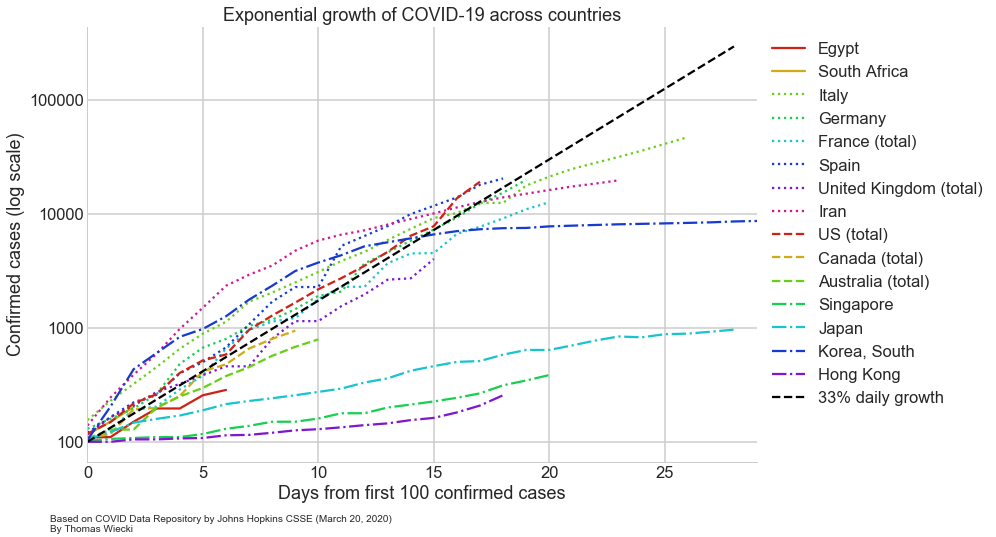

In [8]:
#hide

def plot_countries(df, countries, min_confirmed=100, ls='-', col='confirmed'):
    for country in countries:
        df_country = df.loc[(df.country == country) & (df.confirmed >= min_confirmed)]
        if len(df_country) == 0:
            continue
        df_country.reset_index()[col].plot(label=country, ls=ls)
        
sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip(country_groups, line_styles):
    plot_countries(df, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')

ax.set(yscale='log',
       title='Exponential growth of COVID-19 across countries',
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases (log scale)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.annotate(**annotate_kwargs)
sns.despine();

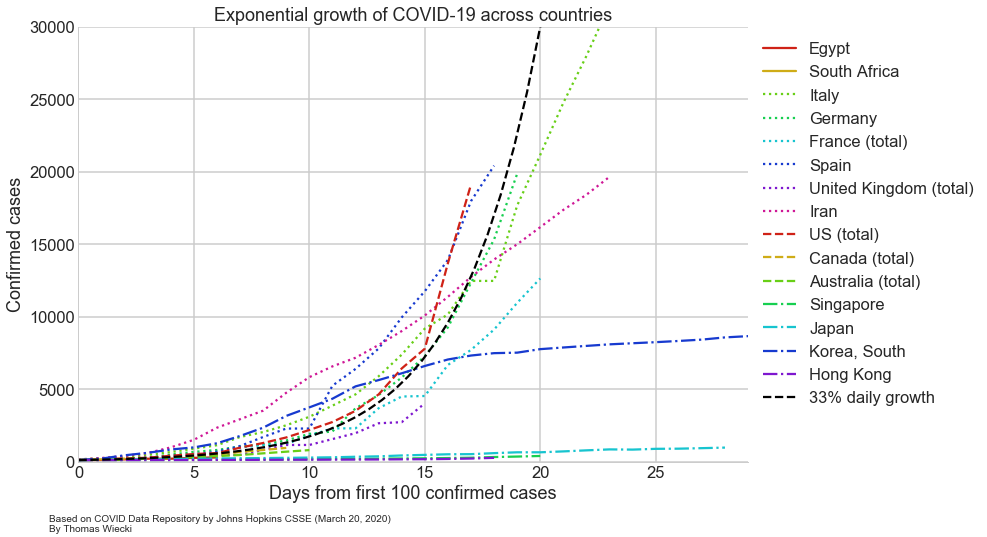

In [9]:
#hide
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip(country_groups, line_styles):
    plot_countries(df, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')

ax.set(title='Exponential growth of COVID-19 across countries',
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases', ylim=(0, 30000))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.annotate(**annotate_kwargs)
sns.despine();

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


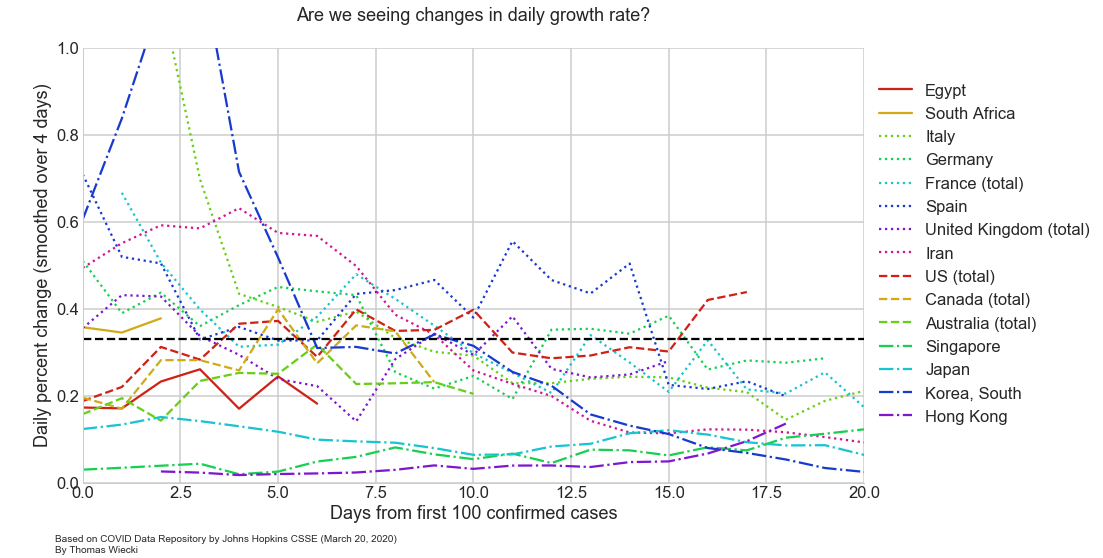

In [21]:


#hide_input
smooth_days = 4
fig, ax = plt.subplots(figsize=(14, 8))
df['pct_change'] = (df
                    .groupby('country')
                    .confirmed
                    .pct_change()
                    .rolling(smooth_days)
                    .mean()
)

for countries, ls in zip(country_groups, line_styles):
    (df.set_index('country')
       .loc[countries]
       .loc[lambda x: x.confirmed > 100]
       .reset_index()
       .set_index('days_since_100')
       .groupby('country', sort=False)['pct_change']
       .plot(ls=ls)
    )

ax.set(ylim=(0, 1),
       xlim=(0, 20),
       title='Are we seeing changes in daily growth rate?\n',
       xlabel='Days from first 100 confirmed cases',
       ylabel='Daily percent change (smoothed over {} days)'.format(smooth_days),
)
ax.axhline(.33, ls='--', color='k')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, .1))
sns.despine()
ax.annotate(**annotate_kwargs);

# This creates a preview image for the blog post and home page
fig.savefig('../images/covid-growth.png')



In [11]:
#hide
df_50 = load_covid_data.load_data_since_case_fifty(drop_states=True)
    
annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE ({})\nBy Thomas Wiecki'.format(df.index.max().strftime('%B %d, %Y')), 
    xy=(0.05, 0.01), xycoords='figure fraction', fontsize=10)

C:\Users\LAPTOP 4\Downloads\Hustle Projects\CaduceusInc\waleopakunle.com\_notebooks\load_covid_data.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  .reset_index(level=['country', 'type']))


In [15]:
df_50.columns

Index(['country', 'state', 'confirmed', 'type', 'critical_estimate',
       'days_since_10', 'recovered', 'deaths'],
      dtype='object')

## Analysis for Africa 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


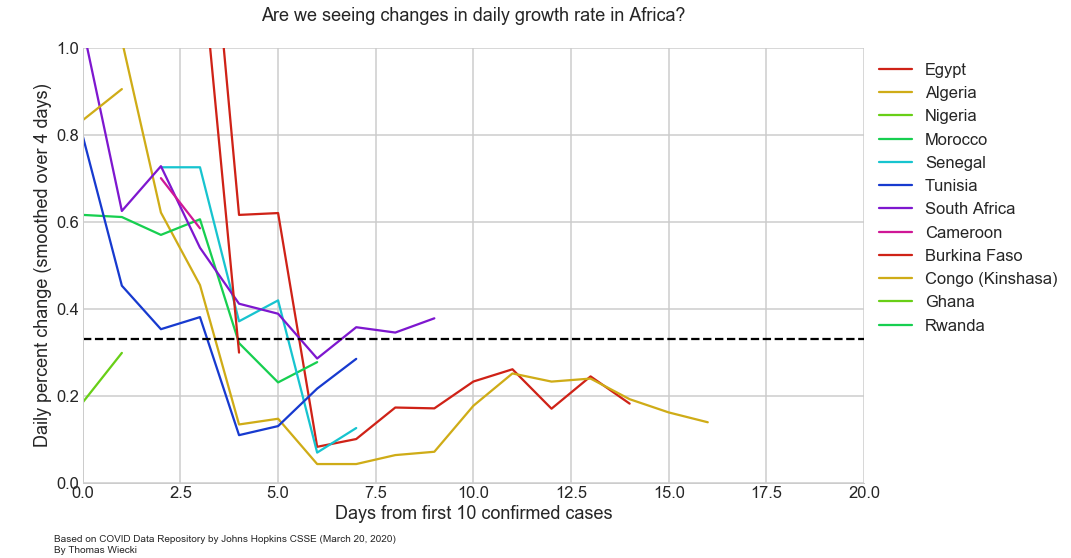

In [19]:

#hide_input
smooth_days = 4
fig, ax = plt.subplots(figsize=(14, 8))
df_50['pct_change'] = (df_50
                    .groupby('country')
                    .confirmed
                    .pct_change()
                    .rolling(smooth_days)
                    .mean()
)

for countries, ls in zip(af_country_groups, line_styles):
    (df_50.set_index('country')
       .loc[countries]
       .loc[lambda x: x.confirmed > 10]
       .reset_index()
       .set_index('days_since_10')
       .groupby('country', sort=False)['pct_change']
       .plot(ls=ls)
    )

ax.set(ylim=(0, 1),
       xlim=(0, 20),
       title='Are we seeing changes in daily growth rate in Africa?\n',
       xlabel='Days from first 10 confirmed cases',
       ylabel='Daily percent change (smoothed over {} days)'.format(smooth_days),
)
ax.axhline(.33, ls='--', color='k')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
sns.despine()
ax.annotate(**annotate_kwargs);

# This creates a preview image for the blog post and home page
fig.savefig('../images/covid-growth.png')



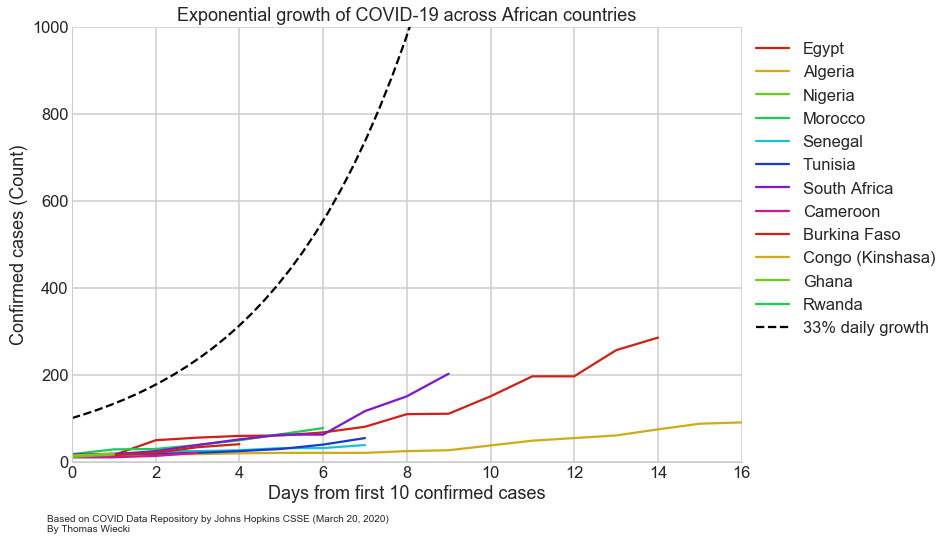

In [26]:
#hide
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip(af_country_groups, line_styles):
    plot_african_countries(df_50, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')

ax.set(title='Exponential growth of COVID-19 across African countries',
       xlabel='Days from first 10 confirmed cases',
       ylabel='Confirmed cases (Count)', ylim=(0, 1000))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.annotate(**annotate_kwargs)
sns.despine();

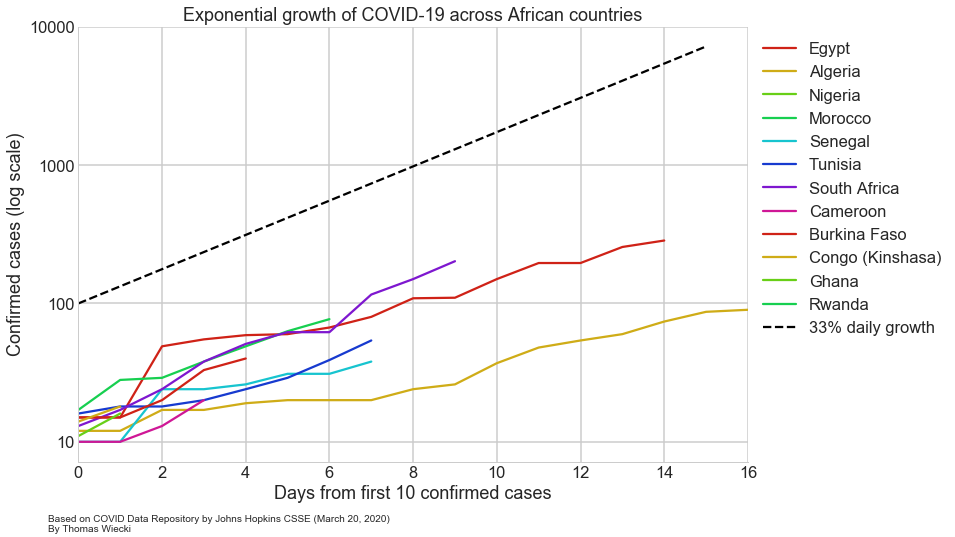

In [22]:
#hide

def plot_african_countries(df, countries, min_confirmed=10, ls='-', col='confirmed'):
    for country in countries:
        df_country = df.loc[(df.country == country) & (df.confirmed >= min_confirmed)]
        if len(df_country) == 0:
            continue
        df_country.reset_index()[col].plot(label=country, ls=ls)
        
sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

for countries, ls in zip(af_country_groups, line_styles):
    plot_african_countries(df_50, countries, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')

ax.set(yscale='log',
       title='Exponential growth of COVID-19 across African countries',
       xlabel='Days from first 10 confirmed cases',
       ylabel='Confirmed cases (log scale)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.annotate(**annotate_kwargs)
sns.despine();